In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import numpy as np

In [2]:
df_food = pd.read_csv("./input/FAO.csv")

In [3]:
df_food.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [4]:
df_food.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [5]:
#df_food.columns

In [6]:
df_food=df_food[['Area', 'Unit', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013']]

In [7]:
df_food.head()

,Area,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,71.0,72.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,1000 tonnes,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,1000 tonnes,210.0,210.0,214.0,216.0,216.0,216.0,235.0,232.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [8]:
url = 'https://stats.oecd.org/Index.aspx?DataSetCode=AIR_GHG'

In [9]:
res = requests.get(url)
html = res.text
soup = BeautifulSoup(html, 'html.parser')

In [10]:
country=soup.findAll(True, {'class':['RowDimLabel', 'RowDimLabel2']})
country_col=[]
for c in country:
        country_col.append((c.text)) 

In [11]:
country_data=soup.findAll(True, {'class':'Data'})
country_datacol=[]


In [12]:
#row2 = soup.find_all('tr', attrs={'class':'row2'})
valores=[]
#for row in row2:    
    #r=row.select('.Data2')    
    #for d in r:
        #valores.append(d.text)
#print(valores)
#type(valores[1])

In [13]:
name_col = []
for f in range(1990, 2018):
    name_col.append(str('{}'.format(f)))

In [14]:
empty_df= pd.DataFrame(np.zeros([len(set(country_col))-1, len(name_col)])*np.nan)

In [15]:
empty_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
empty_df.columns = empty_df.columns[:0].tolist() + name_col

In [17]:
empty_df.columns

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

In [18]:
#empty_df.head()

In [19]:
def ExtractOddColValues(odd_number):
    odd_values=[]
    odd_row = soup.find_all('tr', attrs={'class':'row{}'.format(odd_number)})
    for row in odd_row:    
        r=row.select('.Data')    
        for d in r:
            values_per_row=str(d.text.replace(u'\xa0', u''))
            odd_values.append(values_per_row)
    valores.append(odd_values)
            
            

In [20]:
def ExtractEvenColValues(even_number):
    even_values=[]
    even_row = soup.find_all('tr', attrs={'class':'row{}'.format(even_number)})
    for row in even_row:    
        r=row.select('.Data2')    
        for d in r:
            values_per_row=str(d.text.replace(u'\xa0', u''))
            even_values.append(values_per_row)
    valores.append(even_values)


In [21]:
for number in range(1, 49):
    if number%2==0:
        ExtractEvenColValues(number)
    else:
        ExtractOddColValues(number)
    

In [22]:
len(valores)

48

In [23]:
print(valores)

[['420315.32', '421381.46', '425702.48', '426232.23', '426304.97', '434912.95', '442506.14', '454629.30', '468405.89', '474027.43', '485018.62', '492461.68', '496318.64', '498118.96', '515931.29', '521801.01', '526437.29', '533138.42', '537031.99', '540913.37', '537275.25', '538280.61', '540615.87', '530433.52', '524957.10', '535173.67', '546771.76', '554126.56'], ['78670.34', '82349.31', '75750.43', '75932.30', '76206.72', '79584.03', '82874.67', '82405.08', '81702.16', '80105.18', '80414.98', '84324.34', '86110.74', '91788.39', '91382.84', '92566.56', '90117.31', '87472.74', '86816.18', '80328.50', '84753.26', '82460.30', '79811.33', '80352.53', '76679.76', '78897.25', '79596.11', '82261.47'], ['146586.61', '149323.54', '148920.40', '147890.40', '152522.83', '154665.23', '158303.41', '149781.67', '154956.90', '148644.59', '149729.92', '148131.89', '147567.28', '147932.27', '149230.63', '145283.84', '142660.42', '138960.92', '138827.78', '126262.69', '132921.99', '122198.36', '119372.

In [24]:
for value_list in range(len(valores)):
    empty_df.loc[value_list] = valores[value_list]


In [25]:
empty_df.to_csv(r'./output/Scrapped-Pollution-emissions.csv')

In [26]:
eu=['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Republic of Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
    'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 
    'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']

In [27]:
df_emissions=empty_df.drop(48)

In [28]:
df_emissions

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,420315.32,421381.46,425702.48,426232.23,426304.97,434912.95,442506.14,454629.30,468405.89,474027.43,...,537031.99,540913.37,537275.25,538280.61,540615.87,530433.52,524957.10,535173.67,546771.76,554126.56
1,78670.34,82349.31,75750.43,75932.30,76206.72,79584.03,82874.67,82405.08,81702.16,80105.18,...,86816.18,80328.50,84753.26,82460.30,79811.33,80352.53,76679.76,78897.25,79596.11,82261.47
2,146586.61,149323.54,148920.40,147890.40,152522.83,154665.23,158303.41,149781.67,154956.90,148644.59,...,138827.78,126262.69,132921.99,122198.36,119372.67,119304.38,113505.97,117122.09,115783.18,114539.90
3,602184.44,593402.36,610440.86,612264.42,633675.45,651011.02,672053.10,686988.02,694531.39,707376.02,...,723225.10,681699.30,692618.85,703378.95,711023.23,722062.81,723090.99,721992.08,707727.17,715749.23
4,52015.93,50681.03,52578.97,55432.31,58349.10,61452.14,67715.10,75203.29,76151.21,79278.89,...,94261.93,90886.58,91862.26,99861.19,104492.36,104304.35,101473.89,108243.31,111677.51,..
5,197392.70,179181.86,172686.94,165018.18,157517.67,156717.54,159770.07,155160.05,148998.24,139448.48,...,145614.29,137214.52,139733.69,137753.14,133697.72,128691.10,126758.46,127777.83,129756.68,128675.05
6,70515.44,81145.74,75165.47,77370.35,81266.93,78332.12,91499.91,82058.46,78076.83,75672.13,...,66656.53,63875.91,64178.39,58946.94,54334.57,56021.37,51870.80,49253.85,51297.74,49225.64
7,40431.51,37283.66,27292.13,21350.74,22058.74,20258.55,20960.17,20584.72,18995.56,17652.00,...,20046.14,16757.93,21213.67,21258.93,20170.85,21941.91,21147.38,18126.70,19664.97,20879.88
8,71133.01,68905.03,67468.05,69727.63,75345.91,71788.16,77674.76,76255.50,72566.21,71981.47,...,71399.31,67804.04,75626.97,67805.30,62415.21,62893.83,58733.07,55122.85,58044.31,55334.13
9,551048.69,578336.07,566696.93,545037.07,538663.61,546758.33,564086.62,556744.45,570618.93,562660.84,...,530315.42,510350.61,517115.54,491009.45,490856.47,491141.06,461479.20,466384.62,467622.11,471028.19


In [29]:
countries=[country for country in country_col if country!='']

In [30]:
print(countries)
countries.remove('Non-OECD Economies')

['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States', 'European Union (28 countries)', 'OECD - Europe', 'OECD - Total', 'Non-OECD Economies', 'Argentina', 'Brazil', "China (People's Republic of)", 'Colombia', 'Costa Rica', 'India', 'Indonesia', 'Russia', 'South Africa']


In [31]:
df_emissions.insert(0, 'Country', countries)

In [32]:
df_emissions.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,420315.32,421381.46,425702.48,426232.23,426304.97,434912.95,442506.14,454629.30,468405.89,...,537031.99,540913.37,537275.25,538280.61,540615.87,530433.52,524957.10,535173.67,546771.76,554126.56
1,Austria,78670.34,82349.31,75750.43,75932.30,76206.72,79584.03,82874.67,82405.08,81702.16,...,86816.18,80328.50,84753.26,82460.30,79811.33,80352.53,76679.76,78897.25,79596.11,82261.47
2,Belgium,146586.61,149323.54,148920.40,147890.40,152522.83,154665.23,158303.41,149781.67,154956.90,...,138827.78,126262.69,132921.99,122198.36,119372.67,119304.38,113505.97,117122.09,115783.18,114539.90
3,Canada,602184.44,593402.36,610440.86,612264.42,633675.45,651011.02,672053.10,686988.02,694531.39,...,723225.10,681699.30,692618.85,703378.95,711023.23,722062.81,723090.99,721992.08,707727.17,715749.23
4,Chile,52015.93,50681.03,52578.97,55432.31,58349.10,61452.14,67715.10,75203.29,76151.21,...,94261.93,90886.58,91862.26,99861.19,104492.36,104304.35,101473.89,108243.31,111677.51,..


In [33]:
df_emissions.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [34]:
df_emissions=df_emissions[['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']]

In [35]:
df_emissions['Country'][28]='Slovakia'

/home/eduardo/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [36]:
df_emissions = df_emissions[df_emissions['Country'].isin(eu)]

In [37]:
df_emissions=df_emissions.replace('..', 0.0) #esto cambiarlo por nulos?

In [38]:
def ChangeColType(col):
    if col=='Country':
        df_emissions[col] = df_emissions[col].astype(str)
    else:
        df_emissions[col] = df_emissions[col].astype(float)

for col in df_emissions.columns:
    ChangeColType(col)    

In [39]:
#print(df_emissions.dtypes)

In [40]:
df_emissions.shape

(23, 25)

In [41]:
df_emissions['Activity']= 'Pollution emissions'

Cleaning the food production dataframe.

In [42]:
df_food=df_food.groupby('Area').sum()
df_food

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,10454.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,2395.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271
Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,9355.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161
Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,6460.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639
Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,77.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119
Argentina,43402.0,40784.0,40219.0,41638.0,44936.0,46738.0,47437.0,50357.0,52029.0,54203.0,...,64558.0,72316.0,72146.0,74148.0,75939.0,68422.0,73042.0,78764.0,75946,80843
Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5515.0,5992.0,6228.0,6753.0,6958.0,6824.0,5908.0,6423.0,6978,7175
Australia,25795.0,27618.0,28902.0,29107.0,28961.0,30558.0,30443.0,31344.0,32747.0,33843.0,...,58006.0,63711.0,62564.0,62637.0,64438.0,59813.0,64926.0,61871.0,61955,62446
Austria,22542.0,22627.0,23637.0,24099.0,22664.0,23785.0,23949.0,25094.0,24044.0,24139.0,...,24465.0,24466.0,24030.0,24431.0,25267.0,24731.0,24518.0,25444.0,24071,24990


In [43]:
df_food.columns = df_food.columns.str.replace("Y", "")

In [44]:
df_food=df_food[['1990', '1991', '1992', '1993', '1994', '1995', '1996','1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']]

In [45]:
df_food.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,9782.0,9638.0,9593.0,10773.0,11347.0,12005.0,12671.0,13525.0,14013.0,14315.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
Albania,4281.0,4203.0,4715.0,5213.0,6000.0,6101.0,6173.0,5553.0,5701.0,5954.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271
Algeria,30190.0,31606.0,32906.0,34480.0,33537.0,34190.0,33622.0,33640.0,36214.0,37704.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161
Angola,8163.0,8040.0,8551.0,8408.0,9547.0,10012.0,10394.0,10476.0,11804.0,11984.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639
Antigua and Barbuda,78.0,77.0,85.0,86.0,85.0,81.0,81.0,83.0,83.0,90.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119


In [46]:
df_food.reset_index(inplace = True) 


In [47]:
df_food['Area'][41]='Republic of Cyprus'

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df_food['Area'][42]='Czech Republic'

/home/eduardo/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
df_food = df_food[df_food['Area'].isin(eu)]
df_food.head()

,Area,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
8,Austria,24721.0,24461.0,24427.0,24317.0,24389.0,23295.0,22987.0,24459.0,23958.0,...,24465.0,24466.0,24030.0,24431.0,25267.0,24731.0,24518.0,25444.0,24071,24990
14,Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35273.0,32353.0,32234.0,35016.0,34902.0,34964.0,32708.0,32196.0,31326,33336
23,Bulgaria,26073.0,27231.0,21809.0,19150.0,19537.0,19805.0,17748.0,18398.0,19113.0,...,17512.0,15388.0,14713.0,13637.0,13079.0,13281.0,13463.0,13007.0,11841,12335
39,Croatia,0.0,0.0,9525.0,9972.0,10754.0,11546.0,11790.0,11910.0,12197.0,...,12886.0,12187.0,11916.0,11476.0,13085.0,11937.0,11475.0,11247.0,10234,11467
41,Republic of Cyprus,2320.0,2303.0,2532.0,2702.0,2598.0,2794.0,2729.0,2696.0,2735.0,...,2385.0,2141.0,2234.0,2226.0,2474.0,2337.0,2438.0,2382.0,2186,2243


In [50]:
df_food = df_food.rename(columns={"Area": "Country"})

In [51]:
df_food['Activity']= 'Food Production'

Merging both dataframes

In [52]:
df_together=pd.concat([df_food, df_emissions], ignore_index=True)

In [53]:
df_together

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Activity
0,Austria,24721.00,24461.00,24427.00,24317.00,24389.00,23295.00,22987.00,24459.00,23958.00,...,24466.00,24030.00,24431.00,25267.00,24731.00,24518.00,25444.00,24071.00,24990.00,Food Production
1,Belgium,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,32353.00,32234.00,35016.00,34902.00,34964.00,32708.00,32196.00,31326.00,33336.00,Food Production
2,Bulgaria,26073.00,27231.00,21809.00,19150.00,19537.00,19805.00,17748.00,18398.00,19113.00,...,15388.00,14713.00,13637.00,13079.00,13281.00,13463.00,13007.00,11841.00,12335.00,Food Production
3,Croatia,0.00,0.00,9525.00,9972.00,10754.00,11546.00,11790.00,11910.00,12197.00,...,12187.00,11916.00,11476.00,13085.00,11937.00,11475.00,11247.00,10234.00,11467.00,Food Production
4,Republic of Cyprus,2320.00,2303.00,2532.00,2702.00,2598.00,2794.00,2729.00,2696.00,2735.00,...,2141.00,2234.00,2226.00,2474.00,2337.00,2438.00,2382.00,2186.00,2243.00,Food Production
5,Czech Republic,0.00,0.00,0.00,25372.00,28519.00,29661.00,30701.00,29272.00,28697.00,...,28060.00,24261.00,25583.00,25978.00,26598.00,25118.00,25227.00,23546.00,23978.00,Food Production
6,Denmark,23218.00,23248.00,23610.00,23199.00,23628.00,24633.00,25524.00,26599.00,26624.00,...,28266.00,28703.00,27657.00,27209.00,26677.00,27263.00,26527.00,25719.00,27260.00,Food Production
7,Estonia,0.00,0.00,4771.00,4294.00,3646.00,3675.00,3690.00,3864.00,3800.00,...,3793.00,3469.00,4006.00,3765.00,3780.00,3514.00,3633.00,3781.00,3864.00,Food Production
8,Finland,14901.00,13797.00,13703.00,13207.00,13711.00,13951.00,14118.00,14409.00,14548.00,...,15111.00,14580.00,15526.00,15567.00,15633.00,15254.00,15835.00,16137.00,16183.00,Food Production
9,France,171107.00,176966.00,170332.00,176487.00,173802.00,171303.00,172085.00,172722.00,175638.00,...,177327.00,172824.00,172974.00,177453.00,172872.00,167332.00,169166.00,164096.00,166079.00,Food Production


In [54]:
df_together.sort_values(by=['Country'])

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Activity
0,Austria,24721.00,24461.00,24427.00,24317.00,24389.00,23295.00,22987.00,24459.00,23958.00,...,24466.00,24030.00,24431.00,25267.00,24731.00,24518.00,25444.00,24071.00,24990.00,Food Production
28,Austria,78670.34,82349.31,75750.43,75932.30,76206.72,79584.03,82874.67,82405.08,81702.16,...,92566.56,90117.31,87472.74,86816.18,80328.50,84753.26,82460.30,79811.33,80352.53,Pollution emissions
1,Belgium,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,32353.00,32234.00,35016.00,34902.00,34964.00,32708.00,32196.00,31326.00,33336.00,Food Production
29,Belgium,146586.61,149323.54,148920.40,147890.40,152522.83,154665.23,158303.41,149781.67,154956.90,...,145283.84,142660.42,138960.92,138827.78,126262.69,132921.99,122198.36,119372.67,119304.38,Pollution emissions
2,Bulgaria,26073.00,27231.00,21809.00,19150.00,19537.00,19805.00,17748.00,18398.00,19113.00,...,15388.00,14713.00,13637.00,13079.00,13281.00,13463.00,13007.00,11841.00,12335.00,Food Production
3,Croatia,0.00,0.00,9525.00,9972.00,10754.00,11546.00,11790.00,11910.00,12197.00,...,12187.00,11916.00,11476.00,13085.00,11937.00,11475.00,11247.00,10234.00,11467.00,Food Production
5,Czech Republic,0.00,0.00,0.00,25372.00,28519.00,29661.00,30701.00,29272.00,28697.00,...,28060.00,24261.00,25583.00,25978.00,26598.00,25118.00,25227.00,23546.00,23978.00,Food Production
30,Czech Republic,197392.70,179181.86,172686.94,165018.18,157517.67,156717.54,159770.07,155160.05,148998.24,...,147494.14,148598.76,150336.77,145614.29,137214.52,139733.69,137753.14,133697.72,128691.10,Pollution emissions
6,Denmark,23218.00,23248.00,23610.00,23199.00,23628.00,24633.00,25524.00,26599.00,26624.00,...,28266.00,28703.00,27657.00,27209.00,26677.00,27263.00,26527.00,25719.00,27260.00,Food Production
31,Denmark,70515.44,81145.74,75165.47,77370.35,81266.93,78332.12,91499.91,82058.46,78076.83,...,67090.87,74858.97,70293.31,66656.53,63875.91,64178.39,58946.94,54334.57,56021.37,Pollution emissions


In [55]:
df_together.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       'Activity'],
      dtype='object')

In [56]:
df_together=df_together[['Country','Activity','1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       ]]

In [57]:
df_together

,Country,Activity,1990,1991,1992,1993,1994,1995,1996,1997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Austria,Food Production,24721.00,24461.00,24427.00,24317.00,24389.00,23295.00,22987.00,24459.00,...,24465.00,24466.00,24030.00,24431.00,25267.00,24731.00,24518.00,25444.00,24071.00,24990.00
1,Belgium,Food Production,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,35273.00,32353.00,32234.00,35016.00,34902.00,34964.00,32708.00,32196.00,31326.00,33336.00
2,Bulgaria,Food Production,26073.00,27231.00,21809.00,19150.00,19537.00,19805.00,17748.00,18398.00,...,17512.00,15388.00,14713.00,13637.00,13079.00,13281.00,13463.00,13007.00,11841.00,12335.00
3,Croatia,Food Production,0.00,0.00,9525.00,9972.00,10754.00,11546.00,11790.00,11910.00,...,12886.00,12187.00,11916.00,11476.00,13085.00,11937.00,11475.00,11247.00,10234.00,11467.00
4,Republic of Cyprus,Food Production,2320.00,2303.00,2532.00,2702.00,2598.00,2794.00,2729.00,2696.00,...,2385.00,2141.00,2234.00,2226.00,2474.00,2337.00,2438.00,2382.00,2186.00,2243.00
5,Czech Republic,Food Production,0.00,0.00,0.00,25372.00,28519.00,29661.00,30701.00,29272.00,...,28448.00,28060.00,24261.00,25583.00,25978.00,26598.00,25118.00,25227.00,23546.00,23978.00
6,Denmark,Food Production,23218.00,23248.00,23610.00,23199.00,23628.00,24633.00,25524.00,26599.00,...,27889.00,28266.00,28703.00,27657.00,27209.00,26677.00,27263.00,26527.00,25719.00,27260.00
7,Estonia,Food Production,0.00,0.00,4771.00,4294.00,3646.00,3675.00,3690.00,3864.00,...,3522.00,3793.00,3469.00,4006.00,3765.00,3780.00,3514.00,3633.00,3781.00,3864.00
8,Finland,Food Production,14901.00,13797.00,13703.00,13207.00,13711.00,13951.00,14118.00,14409.00,...,15085.00,15111.00,14580.00,15526.00,15567.00,15633.00,15254.00,15835.00,16137.00,16183.00
9,France,Food Production,171107.00,176966.00,170332.00,176487.00,173802.00,171303.00,172085.00,172722.00,...,181238.00,177327.00,172824.00,172974.00,177453.00,172872.00,167332.00,169166.00,164096.00,166079.00


In [58]:
df_together = df_together.set_index(['Country', 'Activity'])
df_together

,,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,Activity,,,,,,,,,,,,,,,,,,,,,
Austria,Food Production,24721.00,24461.00,24427.00,24317.00,24389.00,23295.00,22987.00,24459.00,23958.00,23080.00,...,24465.00,24466.00,24030.00,24431.00,25267.00,24731.00,24518.00,25444.00,24071.00,24990.00
Belgium,Food Production,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,35273.00,32353.00,32234.00,35016.00,34902.00,34964.00,32708.00,32196.00,31326.00,33336.00
Bulgaria,Food Production,26073.00,27231.00,21809.00,19150.00,19537.00,19805.00,17748.00,18398.00,19113.00,18766.00,...,17512.00,15388.00,14713.00,13637.00,13079.00,13281.00,13463.00,13007.00,11841.00,12335.00
Croatia,Food Production,0.00,0.00,9525.00,9972.00,10754.00,11546.00,11790.00,11910.00,12197.00,12078.00,...,12886.00,12187.00,11916.00,11476.00,13085.00,11937.00,11475.00,11247.00,10234.00,11467.00
Republic of Cyprus,Food Production,2320.00,2303.00,2532.00,2702.00,2598.00,2794.00,2729.00,2696.00,2735.00,2779.00,...,2385.00,2141.00,2234.00,2226.00,2474.00,2337.00,2438.00,2382.00,2186.00,2243.00
Czech Republic,Food Production,0.00,0.00,0.00,25372.00,28519.00,29661.00,30701.00,29272.00,28697.00,28563.00,...,28448.00,28060.00,24261.00,25583.00,25978.00,26598.00,25118.00,25227.00,23546.00,23978.00
Denmark,Food Production,23218.00,23248.00,23610.00,23199.00,23628.00,24633.00,25524.00,26599.00,26624.00,26560.00,...,27889.00,28266.00,28703.00,27657.00,27209.00,26677.00,27263.00,26527.00,25719.00,27260.00
Estonia,Food Production,0.00,0.00,4771.00,4294.00,3646.00,3675.00,3690.00,3864.00,3800.00,3876.00,...,3522.00,3793.00,3469.00,4006.00,3765.00,3780.00,3514.00,3633.00,3781.00,3864.00
Finland,Food Production,14901.00,13797.00,13703.00,13207.00,13711.00,13951.00,14118.00,14409.00,14548.00,14364.00,...,15085.00,15111.00,14580.00,15526.00,15567.00,15633.00,15254.00,15835.00,16137.00,16183.00


In [59]:
df_together=df_together.sort_values(by=['Country'])

In [60]:
df_together=df_together.sort_values(by=['Country']).T

In [61]:
df_together.to_csv(r'./output/food-pollution.csv')

In [62]:
df_together

Country          Austria                             Belgium  \
Activity Food Production Pollution emissions Food Production   
1990             24721.0            78670.34             0.0   
1991             24461.0            82349.31             0.0   
1992             24427.0            75750.43             0.0   
1993             24317.0            75932.30             0.0   
1994             24389.0            76206.72             0.0   
1995             23295.0            79584.03             0.0   
1996             22987.0            82874.67             0.0   
1997             24459.0            82405.08             0.0   
1998             23958.0            81702.16             0.0   
1999             23080.0            80105.18             0.0   
2000             23298.0            80414.98         35680.0   
2001             23707.0            84324.34         35763.0   
2002             23230.0            86110.74         36506.0   
2003             23479.0            91788.39         36217.0   
2004             24465.0            91382.84         35273.0   
2005             24466.0            92566.56         32353.0   
2006             24030.0            90117.31         32234.0   
2007             24431.0            87472.74         35016.0   
2008             25267.0            86816.18         34902.0   
2009             24731.0            80328.50         34964.0   
2010             24518.0            84753.26         32708.0   
2011             25444.0            82460.30         32196.0   
2012             24071.0            79811.33         31326.0   
2013             24990.0            80352.53         33336.0   

Country                             Bulgaria         Croatia  Czech Republic  \
Activity Pollution emissions Food Production Food Production Food Production   
1990               146586.61         26073.0             0.0             0.0   
1991               149323.54         27231.0             0.0             0.0   
1992               148920.40         21809.0          9525.0             0.0   
1993               147890.40         19150.0          9972.0         25372.0   
1994               152522.83         19537.0         10754.0         28519.0   
1995               154665.23         19805.0         11546.0         29661.0   
1996               158303.41         17748.0         11790.0         30701.0   
1997               149781.67         18398.0         11910.0         29272.0   
1998               154956.90         19113.0         12197.0         28697.0   
1999               148644.59         18766.0         12078.0         28563.0   
2000               149729.92         16572.0         11489.0         28075.0   
2001               148131.89         16781.0         13187.0         28125.0   
2002               147567.28         17109.0         13277.0         27970.0   
2003               147932.27         15318.0         12438.0         26401.0   
2004               149230.63         17512.0         12886.0         28448.0   
2005               145283.84         15388.0         12187.0         28060.0   
2006               142660.42         14713.0         11916.0         24261.0   
2007               138960.92         13637.0         11476.0         25583.0   
2008               138827.78         13079.0         13085.0         25978.0   
2009               126262.69         13281.0         11937.0         26598.0   
2010               132921.99         13463.0         11475.0         25118.0   
2011               122198.36         13007.0         11247.0         25227.0   
2012               119372.67         11841.0         10234.0         23546.0   
2013               119304.38         12335.0         11467.0         23978.0   

Country                              Denmark                      ...  \
Activity Pollution emissions Food Production Pollution emissions  ...   
1990               197392.70         23218.0            70515.44  ...   
1991               179181.86       

In [63]:
df_together.shape

(24, 51)

In [64]:
#con esto me dice las dos actividades metiendo año y pais. Hacer función.
df_together.loc['2000','Spain']

Activity
Pollution emissions    387527.93
Food Production        133017.00
Name: 2000, dtype: float64

In [65]:
df_together.columns.levels 

FrozenList([['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Republic of Cyprus', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom'], ['Food Production', 'Pollution emissions']])

In [66]:
#me da la media de ambas actividades a lo largo de los años por país.
df_together[['Austria']].mean(axis=0)

Country  Activity           
Austria  Food Production        24175.875000
         Pollution emissions    83095.009167
dtype: float64

In [67]:
df_together[['Austria']].max(axis=0)

Country  Activity           
Austria  Food Production        25444.00
         Pollution emissions    92566.56
dtype: float64

In [68]:
#df_together.reset_index(level=0, inplace=True)
#df_together = df_together.rename(columns={"Index": "Year"})


In [69]:
df_emissions=df_emissions.T

In [70]:
df_emissions.columns = df_emissions.iloc[0]

In [71]:
df_emissions.drop(df_emissions.tail(1).index,inplace=True) 

In [72]:
df_emissions.drop(df_emissions.head(1).index,inplace=True) 

In [73]:
df_emissions.reset_index(level=0, inplace=True)

In [74]:
df_emissions = df_emissions.rename(columns={"index": "Year"})

In [75]:
df_emissions.to_csv(r'./output/Pollution-emissions.csv')

In [76]:
df_food=df_food.T

In [77]:
df_food.columns = df_food.iloc[0]

In [78]:
df_food.drop(df_food.tail(1).index,inplace=True) 

In [79]:
df_food.drop(df_food.head(1).index,inplace=True) 

In [80]:
df_food.reset_index(level=0, inplace=True)

In [81]:
df_food = df_food.rename(columns={"index": "Year"})

In [82]:
#df_food['Year']=df_food['Year'].astype(int)

In [83]:
df_food

Country,Year,Austria,Belgium,Bulgaria,Croatia,Republic of Cyprus,Czech Republic,Denmark,Estonia,Finland,...,Malta,Netherlands,Poland,Portugal,Romania,Slovakia,Slovenia,Spain,Sweden,United Kingdom
0,1990,24721,0,26073,0,2320,0,23218,0,14901,...,819,70331,149870,28181,62989,0,0,120074,24271,133515
1,1991,24461,0,27231,0,2303,0,23248,0,13797,...,828,62610,141291,27411,60804,0,0,120149,23511,129751
2,1992,24427,0,21809,9525,2532,0,23610,4771,13703,...,860,66338,123873,26344,61463,0,4087,117991,23707,132955
3,1993,24317,0,19150,9972,2702,25372,23199,4294,13207,...,894,58813,140162,27717,59847,13515,4454,117297,24404,131707
4,1994,24389,0,19537,10754,2598,28519,23628,3646,13711,...,847,63656,124010,28202,62280,13147,4760,116546,24661,133588
5,1995,23295,0,19805,11546,2794,29661,24633,3675,13951,...,888,57322,133315,28236,61891,12974,4842,110088,24414,129456
6,1996,22987,0,17748,11790,2729,30701,25524,3690,14118,...,999,58885,132085,28121,60996,13712,5124,120240,24832,134946
7,1997,24459,0,18398,11910,2696,29272,26599,3864,14409,...,988,55002,128013,28212,61843,13142,4998,126645,25143,137653
8,1998,23958,0,19113,12197,2735,28697,26624,3800,14548,...,1099,54021,138942,30510,62742,12688,4795,130147,24751,137296
9,1999,23080,0,18766,12078,2779,28563,26560,3876,14364,...,1090,61762,130514,30553,64218,12362,5092,131408,24746,139757


In [84]:
type(df_food['Year'][0])

str

In [85]:
df_food = df_food.apply(pd.to_numeric)

In [86]:
df_food.to_csv(r'./output/food-production.csv')

In [87]:
#df_food_1.info()

In [89]:
bla = df_food.loc[df_food['France'].idxmax()]

In [90]:
int(bla[0])

2002

In [ ]:
df_food_1['France'].max()

(array([1985., 1990., 1995., 2000., 2005., 2010., 2015.]),
 <a list of 7 Text xticklabel objects>)

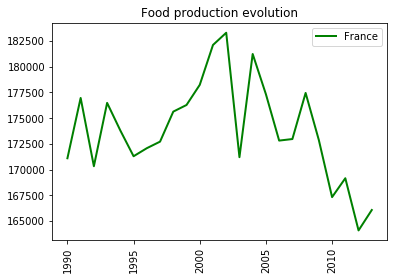

In [97]:
import matplotlib.pyplot as plt
plt.plot('Year', 'France', data=df_food, color = 'green', linewidth=2)
plt.legend()
plt.title('Food production evolution')
plt.xticks(rotation=90)

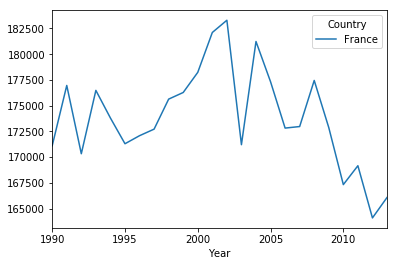

In [99]:
grafica_1=df_food.plot(x='Year', y=['France'])

#df=entrada.sort_values(by=['year', 'suicides_no'], inplace=False)
 #   
  #  df=entrada.sort_values(by=['year', 'gdp_for_year'], inplace=False)
   # grafica_2=df.plot(x='year', y=['gdp_for_year'])
    #return grafica_1, grafica_2

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 <a list of 24 Text xticklabel objects>)

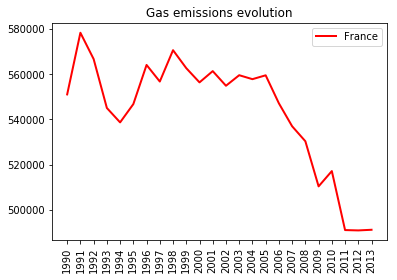

In [95]:

grafico=plt.plot('Year', 'France', data=df_emissions, color = 'red', linewidth=2)
plt.legend()
plt.title('Gas emissions evolution')
plt.xticks(rotation=90)


In [ ]:
df_food[['Austria']].max(axis=0)

In [96]:
print(grafico)

In [ ]:
#df_food.loc[df_food['Austria'].idxmax()]
df_food.loc[df_food.groupby("Year")["Austria"].idxmax()]

In [ ]:
df_food['Austria']